In [6]:
import pandas as pd
import pandas_ta as ta

data = pd.read_csv("data.csv")
data['date'] = pd.to_datetime(data['date'])  
data.set_index('date', inplace=True)

data["EMA8"] = ta.ema(data.close, length=8)
data["EMA21"] = ta.ema(data.close, length=21)
data.dropna(inplace=True)

print(data)

                       open    high     low   close    volume        EMA8  \
date                                                                        
2024-01-30 05:30:00  625.45  633.50  624.20  626.75  16966577  622.776438   
2024-01-31 05:30:00  626.40  643.20  622.00  640.50  23270745  626.715007   
2024-02-01 05:30:00  642.75  652.95  633.25  647.65  26587707  631.367228   
2024-02-02 05:30:00  652.00  660.55  646.70  649.65  27471811  635.430066   
2024-02-05 05:30:00  647.10  654.80  638.75  642.95  28339525  637.101163   
...                     ...     ...     ...     ...       ...         ...   
2024-10-31 05:30:00  820.00  828.00  813.55  820.20  13402324  810.045664   
2024-11-01 05:30:00  822.40  825.60  818.90  821.20   1637141  812.524405   
2024-11-04 05:30:00  822.70  837.50  807.10  829.85  14498161  816.374537   
2024-11-05 05:30:00  829.85  851.40  826.25  849.20  26254561  823.669085   
2024-11-06 05:30:00  849.20  861.40  846.20  854.80  15002433  830.587066   

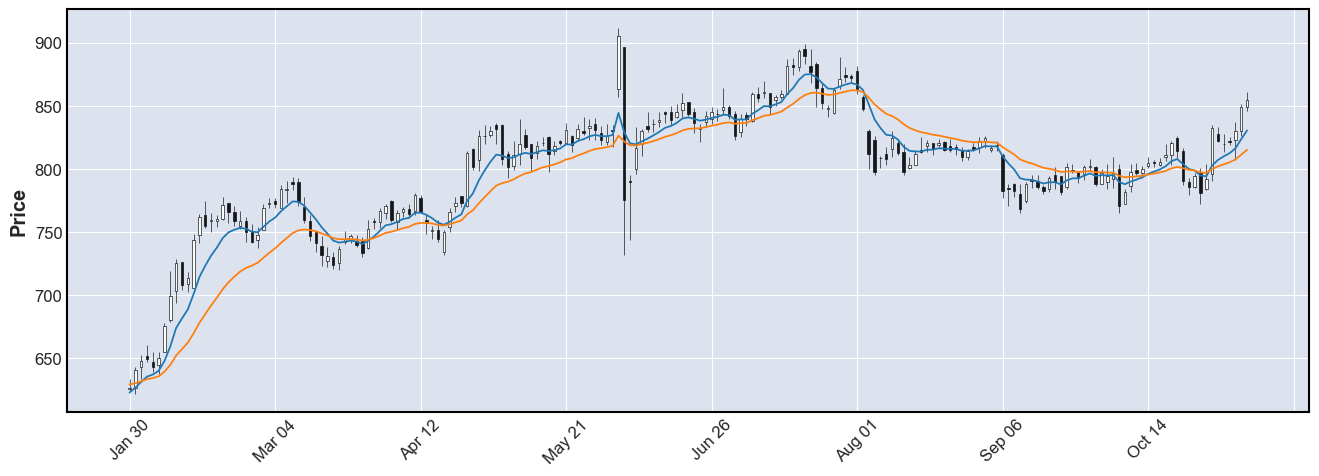

In [7]:
import mplfinance as mpf

adp= [mpf.make_addplot(data['EMA8'],type ='line'),
     mpf.make_addplot(data['EMA21'],type ='line')]


mpf.plot(data,type='candle',figratio=(15,5),addplot=adp)

In [3]:
data = data.copy()

data['Signal'] = 0  # Initializing the 'Signal' column with 0

# Adding Long signals where EMA8 crosses above EMA21 and comparing with the previous bar
data.loc[(data['EMA8'] > data['EMA21']) ,'Signal'] = 1

# Adding Short signals where EMA8 crosses below EMA21 and comparing with the previous bar
data.loc[(data['EMA8'] < data['EMA21']), 'Signal'] = -1
data['close_Shifted'] = data['close'].shift(-1)
data = data.dropna(subset=['close_Shifted'])
data

,open,high,low,close,volume,EMA8,EMA21,Signal,close_Shifted
date,,,,,,,,,
2024-01-30 05:30:00,625.45,633.50,624.20,626.75,16966577,622.776438,629.200000,-1,640.50
2024-01-31 05:30:00,626.40,643.20,622.00,640.50,23270745,626.715007,630.227273,-1,647.65
2024-02-01 05:30:00,642.75,652.95,633.25,647.65,26587707,631.367228,631.811157,-1,649.65
2024-02-02 05:30:00,652.00,660.55,646.70,649.65,27471811,635.430066,633.432870,1,642.95
2024-02-05 05:30:00,647.10,654.80,638.75,642.95,28339525,637.101163,634.298064,1,650.25
...,...,...,...,...,...,...,...,...,...
2024-10-30 05:30:00,828.00,833.00,821.05,822.45,15977682,807.144425,802.100212,1,820.20
2024-10-31 05:30:00,820.00,828.00,813.55,820.20,13402324,810.045664,803.745648,1,821.20
2024-11-01 05:30:00,822.40,825.60,818.90,821.20,1637141,812.524405,805.332407,1,829.85


In [4]:
# Initializing a new column 'MTM' for Mark-to-Market
data['MTM'] = 0.0

# Running a for loop to calculate MTM
for i in range(1, len(data)):
    close_shifted = data.iloc[i]['close_Shifted']
    close = data.iloc[i]['close']

    # Calculate MTM based on Signal value
    if data.iloc[i]['Signal'] == 1:
        # Long position
        data.at[data.index[i], 'MTM'] = (close_shifted - close) if not pd.isna(close_shifted) else 0
    elif data.iloc[i]['Signal'] == -1:
        # Short position
        data.at[data.index[i], 'MTM'] = (close - close_shifted) if not pd.isna(close_shifted) else 0

# Calculating cumulative PNL
data['Cumulative_PNL'] = data['MTM'].cumsum()
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')
data


,open,high,low,close,volume,EMA8,EMA21,Signal,close_Shifted,MTM,Cumulative_PNL
date,,,,,,,,,,,
2024-01-30 05:30:00,625.45,633.50,624.20,626.75,16966577,622.776438,629.200000,-1,640.50,0.00,0.00
2024-01-31 05:30:00,626.40,643.20,622.00,640.50,23270745,626.715007,630.227273,-1,647.65,-7.15,-7.15
2024-02-01 05:30:00,642.75,652.95,633.25,647.65,26587707,631.367228,631.811157,-1,649.65,-2.00,-9.15
2024-02-02 05:30:00,652.00,660.55,646.70,649.65,27471811,635.430066,633.432870,1,642.95,-6.70,-15.85
2024-02-05 05:30:00,647.10,654.80,638.75,642.95,28339525,637.101163,634.298064,1,650.25,7.30,-8.55
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-30 05:30:00,828.00,833.00,821.05,822.45,15977682,807.144425,802.100212,1,820.20,-2.25,29.10
2024-10-31 05:30:00,820.00,828.00,813.55,820.20,13402324,810.045664,803.745648,1,821.20,1.00,30.10
2024-11-01 05:30:00,822.40,825.60,818.90,821.20,1637141,812.524405,805.332407,1,829.85,8.65,38.75


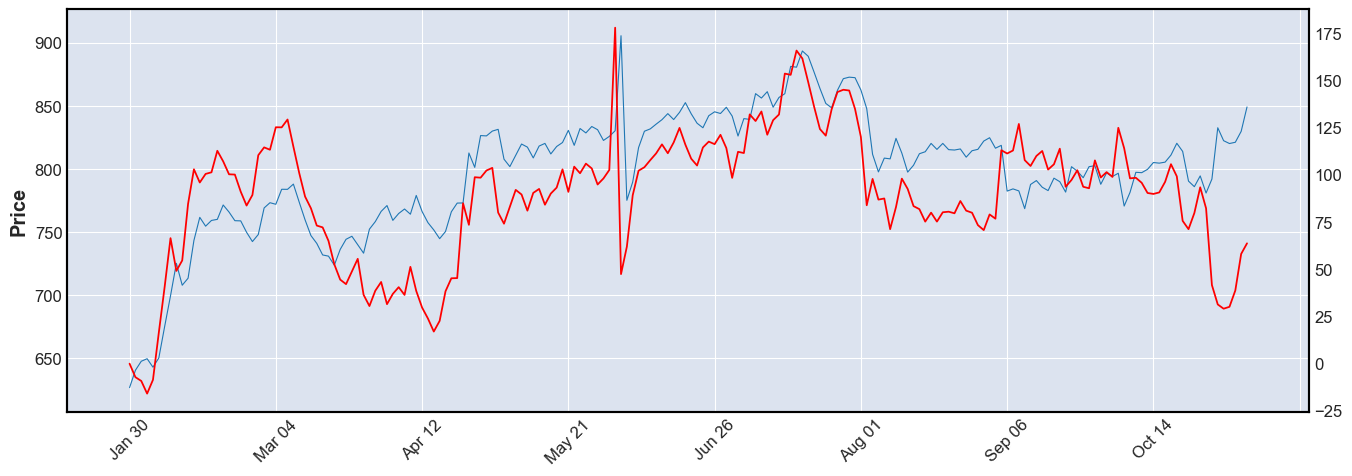

In [5]:
data.index = pd.to_datetime(data.index)
cpd= [
     mpf.make_addplot(data['Cumulative_PNL'],type ='line',color='red')]
mpf.plot(data,type='line',figratio=(15,5),addplot=cpd)